# Trabajando con señales

## Índice

* [Periodicidad](#Periodicidad)
    * [Dominio continuo](#Dominio-continuo)
        * [Periodo fundamental](#Periodo-fundamental-continuo)
    * [Dominio discreto](#Dominio-discreto)
        * [Periodo fundamental](#Periodo-fundamental-discreto)
* [Transfomación de la variable independiente](#Transformación-de-la-variable-independiente)   
* [Operación entre señales discretas](#Operación-entre-señales-discretas)    
    * [Suma de secuencias](#Suma-de-secuencias)
        * [Copias y vistas](#Copias-y-vistas)
    * [Multiplicacón de secuencias](#Multiplicación-de-secuencias)
* [Referencias](#Referencias)
* [Licencia](#Licencia)

## Objetivos del notebook

* Trabajar con señales discretas y continuas.
* Usar funciones lambda.
* Evaluar la periodicidad de una señal.
* Transformar la variable independiente de una señal.
* Operar entre señales.

## Periodicidad

### Dominio continuo

Para las señales sinusoidales en **tiempo continuo**, una oscilación armónica se define como: 

$$x(t) = A\mathrm{cos}(\Omega t+\theta), -\infty<t>+\infty\quad$$

Donde $A$ es la amplitud, $\Omega$(mayuscula) es la frecuencia angular $\Omega=2\pi f$[rad/s], $f$ [Hz] y fase $\theta$ [rad]. Entonces podemos representarla de la siguiente manera:

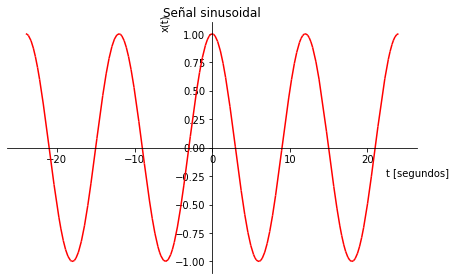

In [1]:
import sympy as sym
from sympy.plotting import plot

t = sym.symbols('t')

A = 1
f = 1/12 # Definición de la frecuencia [Hz][1/s]
O = 0

x = A*sym.cos(2*sym.pi*f*t + O)

# grafico con los resultados y definición del eje temporal [s]
plot(x, (t, -24, 24),line_color='red', title='Señal sinusoidal', xlabel='t [segundos]', ylabel='x(t)')

Podemos corroborar que la energia de una señal periodica es infinita

In [2]:
t, T = sym.symbols('t T')

energia = lambda f: sym.integrate(abs(f)**2,(t,-sym.oo, sym.oo))
potencia = lambda f: sym.limit((1/(2*T)*sym.integrate(f,(t,-sym.oo, sym.oo))),T,sym.oo)

In [3]:
energia(x).evalf()

0.e+105

In [4]:
potencia(x).evalf()

0

> Aca usamos funciones [lambda](https://medium.com/@borjauria/que-son-y-como-utilizar-lambdas-en-python-4d1d168e2f90), que refiere a una pequeña función anónima. Las llamamos *funciones anónimas* porque técnicamente carecen de nombre. Al contrario que una función normal, no la definimos con la palabra clave estándar *def* que utilizamos en Python. En su lugar, las funciones Lambda se definen como una línea que ejecuta una sola expresión. Este tipo de funciones pueden tomar cualquier número de argumentos, pero solo pueden tener una expresión.

#### Periodo fundamental continuo

$$\text{si sabemos que } \Omega = 2\pi f \longrightarrow {\Omega} = 2\pi / T \text{ Donde T [s] es el período}$$

$$X\quad \text{es períodica de período } T \Leftrightarrow X(t \pm T) = X(t), \text{ cuando } T = 2k\pi / {\Omega} \text{ con }k \in\mathbf{N}, \text{ para el } k \text{ más pequeño } T \text{ es } T_0 \text{ , período fundamental con } T_0 \in\mathbf{R}$$

$$\mathrm{cos}\left(2\pi t / 12\right) \text{ como } \Omega= \left (2\pi/12\right) \rightarrow T=\left(2k\pi12/2\pi\right)= 12k \text{ con } k=1  \rightarrow T_0=12$$

In [5]:
import numpy as np

T0 = lambda w0 :np.min(2*np.arange(1,100)*sym.pi/w0)

T0 (2*sym.pi/12)

12

### Dominio discreto

Para las señales sinusoidales en **tiempo discreto**, una oscilación armónica se define como: 

$$x[n] = A\mathrm{cos}[\omega n+\theta], -\infty<n>+\infty\quad$$

Donde $A$ es la amplitud, $\omega$(minuscula) es la frecuencia angular $\omega=2\pi f$[rad/muestras], $f$ [Hz] y fase $\theta$ [rad]. Entonces podemos representarla de la siguiente manera:

Text(0.5, 0, 'Tiempo [s]')

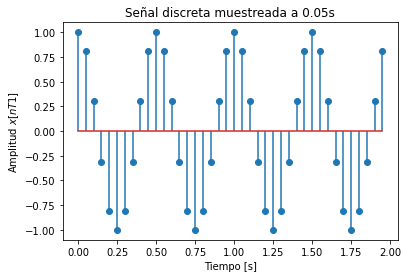

In [8]:
import matplotlib.pyplot as plt

# Definición de los periodos de muestreo [s]
t_final = 2;
F = 20; # 0.5
T1 = 1/F;

# Definicion de la cantindad de muestras en funcion de T
n = np.arange(0, t_final,T1)

# Definición de la frecuencia [Hz], Amplitud y fase
f = 2; #1/12

A = 1
O = 0

# Definicion de las funciones discretas
x = A*np.cos(2*np.pi*f*n) # Calcula la exponencial de todos los elementos de la matriz de entrada.


plt.stem(n,x)
plt.title('Señal discreta muestreada a '+ str(T1)+ 's')
plt.ylabel('Amplitud $x[nT1]$')
plt.xlabel('Tiempo [s]')

### Periodo fundamental discreto

$$\text{si sabemos que } \omega = 2\pi f \longrightarrow \omega = 2\pi / N \text{ Donde N [1/muestra] es el período}$$

$$X\quad \text{es una señal periodica de periodo } N \Leftrightarrow X[n\pm N] = X[n] \text{ donde } N = \frac{2k\pi}{\omega} \text{ con }k\in\mathbf{N}, \text{para el } k \text{ más pequeño } N \text{ es } N_0  \text{ periodo fundamental con } N_0 \in\mathbf{Z}$$

$$\mathrm{cos}\left(2\pi n/ 12\right) \text{ como } \omega= \left (2\pi/12\right) \rightarrow N=\left(2k\pi12/2\pi\right)= 12k \text{ con } k=1  \rightarrow N=12$$

In [6]:
N0 = lambda w0 :2*np.arange(1,100)*np.pi/w0

N0(2*np.pi/12)

array([  12.,   24.,   36.,   48.,   60.,   72.,   84.,   96.,  108.,
        120.,  132.,  144.,  156.,  168.,  180.,  192.,  204.,  216.,
        228.,  240.,  252.,  264.,  276.,  288.,  300.,  312.,  324.,
        336.,  348.,  360.,  372.,  384.,  396.,  408.,  420.,  432.,
        444.,  456.,  468.,  480.,  492.,  504.,  516.,  528.,  540.,
        552.,  564.,  576.,  588.,  600.,  612.,  624.,  636.,  648.,
        660.,  672.,  684.,  696.,  708.,  720.,  732.,  744.,  756.,
        768.,  780.,  792.,  804.,  816.,  828.,  840.,  852.,  864.,
        876.,  888.,  900.,  912.,  924.,  936.,  948.,  960.,  972.,
        984.,  996., 1008., 1020., 1032., 1044., 1056., 1068., 1080.,
       1092., 1104., 1116., 1128., 1140., 1152., 1164., 1176., 1188.])

## Transformación de la variable independiente

Se sabe que dada una **secuencia discreta**:

$$x[n] \Rightarrow x[n \alpha + \beta]$$

$$\text{Si } \vert \alpha \vert < 1 \text{ se expande linealmente}$$

$$\text{Si } \vert \alpha \vert > 1 \text{ se comprime linealmente}$$

$$\text{Si } \alpha < 0 \text{ se invierte en el tiempo}$$

$$\text{Si } \beta  < n \text{ con }n <0 \text{ son } n \text{ lugares a la derecha}$$

$$\text{Si } \beta  > n \text{ con }n >0 \text{ son } n \text{ lugares a la izquierda}$$

$$\text{Si  } x[n] \text{ es reflejado, entonces los movimientos son invertidos}$$

Entonces que sucede con una señal expresada en 2 vectores:

In [ ]:
x = np.array([2,1,-1,0,1,4,3,7]) # secuencia - rango
n = np.arange(-3,5) # indices (o posición) - dominio

plt.stem(n,x,'b')
plt.title('Transformacion de la variable independiente')
plt.ylabel('Amplitud $x[n]$')
plt.xlabel('n')

plt.grid()

# transformaciones
#plt.stem(n+(-2),x,'r',label='original') # mov. der
#plt.stem(n+(2),x,'r') # mov. izq
#plt.stem(-n,x,'r') # inv. temporal
#plt.stem(n/abs(2),x,'r') # comp (la mitad)
#plt.stem(n/abs(0.5),x,'r') # exp. (doble)

Otro ejemplo es con una secuencia continua definida a tramos:

$$x(t)=\begin{cases} 
0, \text{ para } -1<t<0 \\  
1, \text{  para } 0<t<2 \\
2-(t/2), \text{ para } 2<t<4 \\ 
0, \text{ para } 4<t<5 \\  
\end{cases}$$

$$y(t)=x(-2t+1)$$

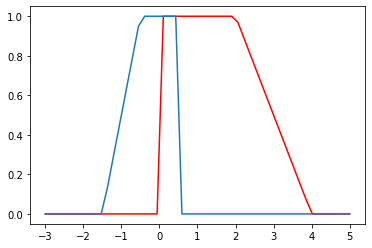

In [9]:
t = np.linspace(-3, 5)
x = lambda t: np.piecewise(t, [(t>-1)&(t<0), (t>0)&(t<2), (t>2)&(t<4), (t>4)&(t<5)], [lambda t: 0, lambda t: 1, lambda t: 2-(t/2), lambda t: 0])

X = x(t)
y = x(-2*t+1)
plt.plot(t,X,'r')
plt.plot(t,y)


## Operación entre señales discretas

### Suma de secuencias
Esto es una suma muestra a muestra dado por:

$$\left\lbrace x_1 \left\lbrack n\right\rbrack \right\rbrace +\left\lbrace x_2 \left\lbrack n\right\rbrack \right\rbrace =\left\lbrace x_1 \left\lbrack n\right\rbrack +x_2 \left\lbrack n\right\rbrack \right\rbrace$$

El problema de sumar secuencias radica en que $x_1[n]$ y $x_2[n]$, deben tener la misma dimensiónes, para lo cual se agregan ceros en la secuencia faltante. En el caso de los vectores de indices, pueden ser distintos:

In [ ]:
x1 = np.array([0,0,1,2,3,0,0,2,2,0])
n1 = np.arange(-2,8)

x2 = np.array([0,-2,-2,2,2,0,-2,0])
n2 = np.arange(-3,5)

In [ ]:
plt.stem(n1,x1,'r')

In [ ]:
plt.stem(n2,x2,'g')

/home/max/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/home/max/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/max/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the 

<StemContainer object of 3 artists>

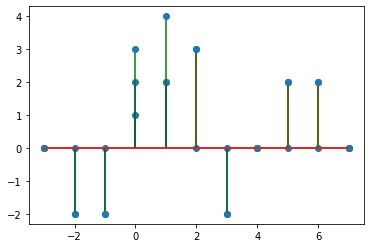

In [111]:
n = np.arange(np.min([np.min(n1),np.min(n2)]),np.max([np.max(n1),np.max(n2)])+1) # duracion y(n)

# inicialización
y1 = np.zeros(n.size)
#y2 = y1.copy()
y2 = y1
# y1 con duracion de x1
y1[np.where((n>=np.min(n1))&(n<=np.max(n1))==1)] = x1
# y2 con duracion de x2
y2[np.where((n>=np.min(n2))&(n<=np.max(n2))==1)] = x2
# suma
y = y1+y2

plt.stem(n,y1,'r')
plt.stem(n,y2,'b')
plt.stem(n,y,'g')

#### Copias y vistas

Si copiamos una lista en Python y modificamos la copia, no se modifica la lista originalmente copiada:

In [106]:
a = [1, 2, 3]
b = a[:]
print (b)
b[0] = 100
print (b)
print (a)

[1, 2, 3]
[100, 2, 3]
[1, 2, 3]


Si trabajamos con arreglos de NumPy, el comportamiento es diferente (cuando copiamos, en realidad, estamos haciendo una vista al objeto original, apuntamos al mismo objeto):

In [107]:
a = np.array([1, 2, 3])
b = a[:]
print (b)
b[0] = 100
print (b)
print (a)

[1 2 3]
[100   2   3]
[100   2   3]


In [108]:
a = np.array([1, 2, 3])
b = a[:].copy() # fuerzo la copia
print (b)
b[0] = 100
print (b)
print (a)

[1 2 3]
[100   2   3]
[1 2 3]


> Siempre devuelve vistas para evitar incrementos innecesarios de memoria. Este comportamiento por defecto es realmente muy útil, significa que, trabajando con grandes conjuntos de datos, podemos acceder y procesar piezas de estos conjuntos de datos sin necesidad de copiar el buffer de datos original.

### Multiplicación de secuencias
Esto es un producto muestra a muestra (o producto punto) dado por:

$$\left\lbrace x_1 \left\lbrack n\right\rbrack \right\rbrace \ldotp \left\lbrace x_2 \left\lbrack n\right\rbrack \right\rbrace =\left\lbrace x_1 \left\lbrack n\right\rbrack x_2 \left\lbrack n\right\rbrack \right\rbrace$$

El problema de multiplicar secuencia radica en que $x_1[n]$ y $x_2[n]$ , deben tener la misma dimensiónes, para lo cual se agregan ceros en la secuencia faltante. En el caso de los vectores de indices, pueden ser distintos:

In [ ]:
# completar

## Referencias

 * *Numpy User Guide*, https://www.numpy.org/
 * Scott, Shell, *An introduction to Numpy and Scipy*, 2014. 
 * Martín, Gaitán. *Curso de Python para ciencias e ingenierías*. Extraido de [GitHub](https://github.com/mgaitan/curso-python-cientifico), 2017.
 * Oppenheim, Alan V.; Willsky, Alan S.; Nawab, S. Hamid. Señales y sistemas. Pearson Educación, 1998.
 * Jesús C, https://thepythonlab.com/numpy/
 * Damian Vila, https://damianavila.github.io/Python-Cientifico-HCC/3_NumPy.html

## Licencia

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Este documento se destribuye con una <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">licencia Atribución CompartirIgual 4.0 Internacional de Creative Commons</a>.

Material adaptado del curso [Introducción a Python](https://github.com/infiniemlabs-acustica/python_introduccion)

© 2020. Infiniem Labs Acústica. infiniemlab.dsp@gmail.com (CC BY-SA 4.0))